In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt
import operator
import torch
from collections import deque
import copy
from torch.autograd import Variable
import random
# from IPython import display as ipythondisplay

In [2]:
class DQN(object):
    """docstring for DQN"""
    def __init__(self, env):
        super(DQN, self).__init__()
        self.epsilon = 1
        self.epsilon_decay = 0.99
        self.epsilon_min = 0.001
        self.nS = env.observation_space.shape[0]
        self.nA = env.action_space.n
        self.action_network = self.get_model()
        self.optimizer = torch.optim.SGD(self.action_network.parameters(), lr=1e-4, momentum=0.5)
        self.loss_fn = torch.nn.MSELoss(reduction='sum')
        self.gamma = 0.99
        
    def get_model(self):

        model = torch.nn.Sequential(
            torch.nn.Linear(self.nS-2, self.nA),
        )
        return model
        
    def get_action(self, state):
        # epsilon action
        if np.random.uniform() < self.epsilon:
            return np.random.choice(self.nA)
        else:
            return torch.max(self.action_network(Variable(torch.from_numpy(state))),0)[1].data.numpy().item()
        
    def train(self, state, action, reward, next_state, done):
      
        minibatch = [(state, action, reward, next_state, done)]
        minibatch = np.array(minibatch)

        y_target = Variable(torch.from_numpy(np.array(minibatch[:,2],dtype='float')).float())

        non_terminating_indices = np.where(minibatch[:,4] == False)

        if len(non_terminating_indices[0]):
            
            y_action_next = self.action_network(Variable(torch.from_numpy(np.vstack(minibatch[:,3]))))
            _,optimal_action_next = y_action_next[non_terminating_indices].max(-1)
            y_target_next = self.action_network(Variable(torch.from_numpy(np.vstack(minibatch[:,3]))))
            y_target[non_terminating_indices] += self.gamma*(y_target_next[non_terminating_indices, optimal_action_next][0])

        y = self.action_network(Variable(torch.from_numpy(np.vstack(minibatch[:,0]))))
        y = y[range(len(y)),np.array(minibatch[:,1],dtype='int')]

        loss = self.loss_fn(y_target, y)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

In [3]:
env_name = 'LunarLander-v2'
env = gym.make(env_name)

agent = DQN(env)

resume_episodes = 0
num_episodes = 3000
episode_length = 1000

rewards = []

for episode in range(resume_episodes, num_episodes):

    episode_reward = 0
    state = env.reset()
    state = state[2:]

    for step in range(episode_length):
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        episode_reward += reward
        
        next_state = next_state[2:]
        
        agent.train(state, action, reward, next_state, done)

        if done:
            break
        else:
            state = next_state

    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

    rewards.append(episode_reward)
    print ("reward for episode", episode, "is", episode_reward)
    print ("length of episode", episode, "is", step)

reward for episode 0 is -104.82952658965692
length of episode 0 is 65
reward for episode 1 is -106.59958332121711
length of episode 1 is 57
reward for episode 2 is -380.5027442886113
length of episode 2 is 98
reward for episode 3 is -133.380284015792
length of episode 3 is 86
reward for episode 4 is -100.58344820554922
length of episode 4 is 60
reward for episode 5 is -115.90367997554796
length of episode 5 is 67
reward for episode 6 is -6.994604432707277
length of episode 6 is 84
reward for episode 7 is -414.9098210673336
length of episode 7 is 83
reward for episode 8 is -96.03944923657833
length of episode 8 is 100
reward for episode 9 is -87.48581105462137
length of episode 9 is 66
reward for episode 10 is -190.32813510744677
length of episode 10 is 68
reward for episode 11 is 30.093503247301346
length of episode 11 is 999
reward for episode 12 is -255.40234395731346
length of episode 12 is 104
reward for episode 13 is -320.3393007836164
length of episode 13 is 74
reward for episode

reward for episode 114 is -188.6118958711118
length of episode 114 is 999
reward for episode 115 is -59.14148985878953
length of episode 115 is 215
reward for episode 116 is -262.5242909460575
length of episode 116 is 347
reward for episode 117 is -367.6284926451964
length of episode 117 is 274
reward for episode 118 is -13.152697233993152
length of episode 118 is 401
reward for episode 119 is -223.72917396110014
length of episode 119 is 277
reward for episode 120 is -193.1388152207902
length of episode 120 is 999
reward for episode 121 is 14.310105344270653
length of episode 121 is 147
reward for episode 122 is -120.81609887450287
length of episode 122 is 125
reward for episode 123 is -183.10593162555932
length of episode 123 is 999
reward for episode 124 is -187.82546471289302
length of episode 124 is 333
reward for episode 125 is -193.1203223474094
length of episode 125 is 334
reward for episode 126 is 174.22210501251328
length of episode 126 is 390
reward for episode 127 is 31.8724

reward for episode 225 is -272.78479035039936
length of episode 225 is 284
reward for episode 226 is -78.58653040949548
length of episode 226 is 195
reward for episode 227 is -101.88451332080052
length of episode 227 is 156
reward for episode 228 is -238.53880747312562
length of episode 228 is 262
reward for episode 229 is -254.72264346920542
length of episode 229 is 171
reward for episode 230 is -95.51382104716265
length of episode 230 is 117
reward for episode 231 is -67.44063789847601
length of episode 231 is 251
reward for episode 232 is -106.45202071732922
length of episode 232 is 325
reward for episode 233 is -203.004021294967
length of episode 233 is 294
reward for episode 234 is -15.024203883312978
length of episode 234 is 256
reward for episode 235 is -321.75187093793306
length of episode 235 is 380
reward for episode 236 is -357.5072956222489
length of episode 236 is 354
reward for episode 237 is -248.6095798607927
length of episode 237 is 230
reward for episode 238 is -259.5

reward for episode 336 is 0.12300386022189969
length of episode 336 is 277
reward for episode 337 is -226.3244897513207
length of episode 337 is 213
reward for episode 338 is -107.4238849626407
length of episode 338 is 215
reward for episode 339 is -84.77859205959653
length of episode 339 is 162
reward for episode 340 is -318.9240632017629
length of episode 340 is 486
reward for episode 341 is 205.2533202165402
length of episode 341 is 668
reward for episode 342 is -45.065527004326526
length of episode 342 is 149
reward for episode 343 is -27.685075860520172
length of episode 343 is 168
reward for episode 344 is -107.8129251638639
length of episode 344 is 240
reward for episode 345 is -207.88950704586603
length of episode 345 is 302
reward for episode 346 is -165.16933021390898
length of episode 346 is 999
reward for episode 347 is -119.22283875746982
length of episode 347 is 999
reward for episode 348 is -182.00691546152632
length of episode 348 is 999
reward for episode 349 is -224.0

reward for episode 447 is -611.6722601646204
length of episode 447 is 81
reward for episode 448 is -542.8404202671827
length of episode 448 is 77
reward for episode 449 is -190.6267681042225
length of episode 449 is 59
reward for episode 450 is -432.1180557937215
length of episode 450 is 49
reward for episode 451 is -429.64243330869755
length of episode 451 is 56
reward for episode 452 is -121.4452102920747
length of episode 452 is 75
reward for episode 453 is -120.17918200728232
length of episode 453 is 70
reward for episode 454 is -102.7147819540981
length of episode 454 is 52
reward for episode 455 is -123.47312608236362
length of episode 455 is 79
reward for episode 456 is -198.6905516186335
length of episode 456 is 95
reward for episode 457 is -8.503488532093087
length of episode 457 is 177
reward for episode 458 is -323.89954664391615
length of episode 458 is 646
reward for episode 459 is -116.01517315342458
length of episode 459 is 108
reward for episode 460 is -256.421988352337

reward for episode 559 is -159.21233034851826
length of episode 559 is 144
reward for episode 560 is -279.0358338647588
length of episode 560 is 130
reward for episode 561 is -351.85694126777
length of episode 561 is 144
reward for episode 562 is -61.92026275886107
length of episode 562 is 101
reward for episode 563 is -286.3249052008481
length of episode 563 is 421
reward for episode 564 is -259.5011519032762
length of episode 564 is 269
reward for episode 565 is -77.82848180588545
length of episode 565 is 105
reward for episode 566 is -57.53501644625743
length of episode 566 is 233
reward for episode 567 is -105.95045393877474
length of episode 567 is 215
reward for episode 568 is -473.5196543104313
length of episode 568 is 71
reward for episode 569 is -397.9354136300171
length of episode 569 is 80
reward for episode 570 is -204.35056497364062
length of episode 570 is 80
reward for episode 571 is -361.9956387584353
length of episode 571 is 51
reward for episode 572 is -146.7749133145

reward for episode 673 is 10.250811940278723
length of episode 673 is 142
reward for episode 674 is -191.228676597262
length of episode 674 is 156
reward for episode 675 is -123.6558192580795
length of episode 675 is 316
reward for episode 676 is -114.78607980020537
length of episode 676 is 103
reward for episode 677 is 215.02163988726483
length of episode 677 is 596
reward for episode 678 is -79.3185082656557
length of episode 678 is 89
reward for episode 679 is -104.2383705653159
length of episode 679 is 87
reward for episode 680 is 184.9781586137879
length of episode 680 is 536
reward for episode 681 is -283.3721206511193
length of episode 681 is 407
reward for episode 682 is -412.27998103787803
length of episode 682 is 248
reward for episode 683 is -364.64385496272166
length of episode 683 is 53
reward for episode 684 is -486.14065355503305
length of episode 684 is 70
reward for episode 685 is -655.6730945135339
length of episode 685 is 140
reward for episode 686 is -462.0874946527

reward for episode 785 is -267.1799017655588
length of episode 785 is 140
reward for episode 786 is -461.4173356474319
length of episode 786 is 61
reward for episode 787 is -12.699396075849918
length of episode 787 is 272
reward for episode 788 is -320.7365099365138
length of episode 788 is 114
reward for episode 789 is -233.09184583607927
length of episode 789 is 98
reward for episode 790 is -76.65478510557313
length of episode 790 is 97
reward for episode 791 is -256.1804800349936
length of episode 791 is 407
reward for episode 792 is -492.6926642925073
length of episode 792 is 138
reward for episode 793 is -512.7711592851986
length of episode 793 is 131
reward for episode 794 is -195.9764825325692
length of episode 794 is 999
reward for episode 795 is -177.4994121810085
length of episode 795 is 999
reward for episode 796 is -105.10813437231711
length of episode 796 is 999
reward for episode 797 is -10.802728891443465
length of episode 797 is 296
reward for episode 798 is -193.578561

reward for episode 896 is -349.28599431894895
length of episode 896 is 216
reward for episode 897 is -274.7253171296444
length of episode 897 is 674
reward for episode 898 is -297.32812596000144
length of episode 898 is 567
reward for episode 899 is -258.2008743936535
length of episode 899 is 324
reward for episode 900 is -353.04055636704527
length of episode 900 is 82
reward for episode 901 is -570.4254706428037
length of episode 901 is 139
reward for episode 902 is -445.5516279426351
length of episode 902 is 74
reward for episode 903 is -644.6227933189874
length of episode 903 is 78
reward for episode 904 is -579.6692678301048
length of episode 904 is 64
reward for episode 905 is -492.32672256805665
length of episode 905 is 69
reward for episode 906 is -408.0885886247363
length of episode 906 is 51
reward for episode 907 is -460.76317379596935
length of episode 907 is 53
reward for episode 908 is -117.51522562350083
length of episode 908 is 55
reward for episode 909 is -515.994440464

reward for episode 1009 is -730.2321479955995
length of episode 1009 is 90
reward for episode 1010 is -306.68763543311354
length of episode 1010 is 59
reward for episode 1011 is -346.35894919558206
length of episode 1011 is 54
reward for episode 1012 is -500.45288586111656
length of episode 1012 is 60
reward for episode 1013 is -545.0784284637052
length of episode 1013 is 62
reward for episode 1014 is -513.7540450315677
length of episode 1014 is 58
reward for episode 1015 is -193.06178546530037
length of episode 1015 is 87
reward for episode 1016 is -237.0243362246796
length of episode 1016 is 98
reward for episode 1017 is -150.55391327801235
length of episode 1017 is 83
reward for episode 1018 is -226.52469351391227
length of episode 1018 is 70
reward for episode 1019 is -176.3188648625489
length of episode 1019 is 82
reward for episode 1020 is -164.59843518920914
length of episode 1020 is 67
reward for episode 1021 is -117.25149845130892
length of episode 1021 is 59
reward for episod

reward for episode 1121 is -154.59495804615653
length of episode 1121 is 83
reward for episode 1122 is -58.20838675694834
length of episode 1122 is 999
reward for episode 1123 is -167.48820025796678
length of episode 1123 is 999
reward for episode 1124 is -162.82877943323
length of episode 1124 is 999
reward for episode 1125 is -130.4226321289846
length of episode 1125 is 999
reward for episode 1126 is -135.09456199937193
length of episode 1126 is 999
reward for episode 1127 is -120.01035100093627
length of episode 1127 is 999
reward for episode 1128 is -147.41535454235904
length of episode 1128 is 999
reward for episode 1129 is -195.89606118109913
length of episode 1129 is 999
reward for episode 1130 is -139.19478251227525
length of episode 1130 is 999
reward for episode 1131 is -147.53965984040465
length of episode 1131 is 999
reward for episode 1132 is 230.99808921724997
length of episode 1132 is 351
reward for episode 1133 is -132.97878429303125
length of episode 1133 is 999
reward

reward for episode 1230 is -444.03913022133463
length of episode 1230 is 57
reward for episode 1231 is -51.242200362263674
length of episode 1231 is 121
reward for episode 1232 is -283.61829394307676
length of episode 1232 is 125
reward for episode 1233 is -43.80691568603339
length of episode 1233 is 53
reward for episode 1234 is -308.31776292730115
length of episode 1234 is 65
reward for episode 1235 is -123.10684430826144
length of episode 1235 is 140
reward for episode 1236 is -216.67099509986843
length of episode 1236 is 75
reward for episode 1237 is -565.294535782039
length of episode 1237 is 403
reward for episode 1238 is -238.09873746337627
length of episode 1238 is 89
reward for episode 1239 is -278.84452406014276
length of episode 1239 is 196
reward for episode 1240 is -160.61278833160762
length of episode 1240 is 999
reward for episode 1241 is -170.87834142718685
length of episode 1241 is 600
reward for episode 1242 is -127.79243851730084
length of episode 1242 is 999
reward 

reward for episode 1342 is -59.36282542015421
length of episode 1342 is 76
reward for episode 1343 is -67.43393907283586
length of episode 1343 is 999
reward for episode 1344 is -196.67090219886362
length of episode 1344 is 999
reward for episode 1345 is -348.2926053825583
length of episode 1345 is 882
reward for episode 1346 is -298.60651871314263
length of episode 1346 is 577
reward for episode 1347 is -276.48018700985165
length of episode 1347 is 287
reward for episode 1348 is -35.042278032169094
length of episode 1348 is 158
reward for episode 1349 is -80.04289897398995
length of episode 1349 is 316
reward for episode 1350 is -197.05812742996574
length of episode 1350 is 613
reward for episode 1351 is -75.66126765867388
length of episode 1351 is 93
reward for episode 1352 is -369.0248051784257
length of episode 1352 is 939
reward for episode 1353 is -189.1092861697583
length of episode 1353 is 217
reward for episode 1354 is -133.4815138979005
length of episode 1354 is 401
reward fo

reward for episode 1450 is -166.49708388439328
length of episode 1450 is 999
reward for episode 1451 is -0.9068787175969273
length of episode 1451 is 999
reward for episode 1452 is -99.73021197704189
length of episode 1452 is 999
reward for episode 1453 is -172.9771759652612
length of episode 1453 is 999
reward for episode 1454 is -159.10469214669982
length of episode 1454 is 295
reward for episode 1455 is -134.00187200333443
length of episode 1455 is 217
reward for episode 1456 is -214.1875351922124
length of episode 1456 is 116
reward for episode 1457 is -258.17164830262766
length of episode 1457 is 341
reward for episode 1458 is -213.72220553812565
length of episode 1458 is 373
reward for episode 1459 is -251.45434193511622
length of episode 1459 is 70
reward for episode 1460 is -432.03909950419586
length of episode 1460 is 490
reward for episode 1461 is -94.8503976980569
length of episode 1461 is 98
reward for episode 1462 is -56.143619947615385
length of episode 1462 is 86
reward 

reward for episode 1558 is -485.54697488924904
length of episode 1558 is 743
reward for episode 1559 is 184.75075437747716
length of episode 1559 is 520
reward for episode 1560 is -211.89057762457006
length of episode 1560 is 999
reward for episode 1561 is -93.5519591714043
length of episode 1561 is 495
reward for episode 1562 is 12.596684270184383
length of episode 1562 is 294
reward for episode 1563 is -320.86796969342606
length of episode 1563 is 761
reward for episode 1564 is -78.36534390410125
length of episode 1564 is 239
reward for episode 1565 is -231.70732208450292
length of episode 1565 is 490
reward for episode 1566 is -262.45644388329646
length of episode 1566 is 182
reward for episode 1567 is -331.62533315059665
length of episode 1567 is 49
reward for episode 1568 is -237.74245415450133
length of episode 1568 is 319
reward for episode 1569 is -242.13303269338175
length of episode 1569 is 438
reward for episode 1570 is -292.64567016719377
length of episode 1570 is 261
rewar

reward for episode 1668 is -89.89419839094566
length of episode 1668 is 304
reward for episode 1669 is -339.343371455035
length of episode 1669 is 242
reward for episode 1670 is -244.7302042866022
length of episode 1670 is 56
reward for episode 1671 is -218.04930491541566
length of episode 1671 is 411
reward for episode 1672 is -222.5986598749128
length of episode 1672 is 224
reward for episode 1673 is -143.3574704899269
length of episode 1673 is 201
reward for episode 1674 is -400.5265362099029
length of episode 1674 is 70
reward for episode 1675 is -257.22801665673256
length of episode 1675 is 98
reward for episode 1676 is -345.1401368802847
length of episode 1676 is 123
reward for episode 1677 is -222.39913343388272
length of episode 1677 is 171
reward for episode 1678 is -274.42797196837773
length of episode 1678 is 182
reward for episode 1679 is -447.6309685164457
length of episode 1679 is 83
reward for episode 1680 is -244.6185172816114
length of episode 1680 is 181
reward for ep

reward for episode 1777 is -271.832973088705
length of episode 1777 is 72
reward for episode 1778 is -248.15909033349956
length of episode 1778 is 81
reward for episode 1779 is -389.2954024022365
length of episode 1779 is 64
reward for episode 1780 is -373.5063546543974
length of episode 1780 is 51
reward for episode 1781 is -548.5184161362333
length of episode 1781 is 59
reward for episode 1782 is -180.0387848389599
length of episode 1782 is 68
reward for episode 1783 is -53.652309757287
length of episode 1783 is 61
reward for episode 1784 is -192.31177955568916
length of episode 1784 is 54
reward for episode 1785 is -406.1184331119869
length of episode 1785 is 54
reward for episode 1786 is -124.81117326307495
length of episode 1786 is 82
reward for episode 1787 is -6.286705274944055
length of episode 1787 is 87
reward for episode 1788 is -130.14466027755475
length of episode 1788 is 150
reward for episode 1789 is -458.4878384041963
length of episode 1789 is 115
reward for episode 179

reward for episode 1886 is -151.17931095869474
length of episode 1886 is 999
reward for episode 1887 is -118.56717636988022
length of episode 1887 is 999
reward for episode 1888 is -124.20805639696749
length of episode 1888 is 107
reward for episode 1889 is -155.5255490445879
length of episode 1889 is 999
reward for episode 1890 is -226.6951427967452
length of episode 1890 is 407
reward for episode 1891 is -114.76257090649302
length of episode 1891 is 303
reward for episode 1892 is -142.8243163772292
length of episode 1892 is 479
reward for episode 1893 is -156.28115372799172
length of episode 1893 is 427
reward for episode 1894 is -111.61604851430698
length of episode 1894 is 91
reward for episode 1895 is -345.3890181926716
length of episode 1895 is 59
reward for episode 1896 is -443.6655808995863
length of episode 1896 is 100
reward for episode 1897 is -138.76796359619257
length of episode 1897 is 87
reward for episode 1898 is -91.92499756148894
length of episode 1898 is 53
reward fo

reward for episode 1995 is -380.3530031062595
length of episode 1995 is 584
reward for episode 1996 is -300.76960216822056
length of episode 1996 is 304
reward for episode 1997 is -90.69230675258211
length of episode 1997 is 160
reward for episode 1998 is -348.9721682527713
length of episode 1998 is 212
reward for episode 1999 is -467.3313364271026
length of episode 1999 is 124
reward for episode 2000 is -662.1113498276159
length of episode 2000 is 76
reward for episode 2001 is -304.00485972640155
length of episode 2001 is 81
reward for episode 2002 is -217.67425875525376
length of episode 2002 is 285
reward for episode 2003 is -298.3975087982858
length of episode 2003 is 259
reward for episode 2004 is -519.4058717770534
length of episode 2004 is 73
reward for episode 2005 is -458.4439798610494
length of episode 2005 is 93
reward for episode 2006 is -468.6472658833387
length of episode 2006 is 75
reward for episode 2007 is -296.34088270315294
length of episode 2007 is 252
reward for ep

reward for episode 2104 is -395.26931290892423
length of episode 2104 is 115
reward for episode 2105 is -192.73448175997115
length of episode 2105 is 72
reward for episode 2106 is -32.48682759802206
length of episode 2106 is 98
reward for episode 2107 is -318.37105104442594
length of episode 2107 is 219
reward for episode 2108 is -210.73451209227252
length of episode 2108 is 232
reward for episode 2109 is -550.4973564128499
length of episode 2109 is 190
reward for episode 2110 is -695.008316882741
length of episode 2110 is 77
reward for episode 2111 is -487.0288387781307
length of episode 2111 is 107
reward for episode 2112 is -411.82463526982974
length of episode 2112 is 58
reward for episode 2113 is -442.9036453109418
length of episode 2113 is 186
reward for episode 2114 is -476.68893102372493
length of episode 2114 is 62
reward for episode 2115 is -51.291847908205156
length of episode 2115 is 109
reward for episode 2116 is -113.39173998160828
length of episode 2116 is 99
reward for 

reward for episode 2212 is -249.27413620822293
length of episode 2212 is 999
reward for episode 2213 is -260.02193787239673
length of episode 2213 is 73
reward for episode 2214 is -34.65576698564007
length of episode 2214 is 999
reward for episode 2215 is -418.86496540694696
length of episode 2215 is 273
reward for episode 2216 is -253.75183547737797
length of episode 2216 is 670
reward for episode 2217 is -67.90514323420317
length of episode 2217 is 264
reward for episode 2218 is -397.048295095419
length of episode 2218 is 885
reward for episode 2219 is -205.47136866158917
length of episode 2219 is 518
reward for episode 2220 is 24.38011923254261
length of episode 2220 is 123
reward for episode 2221 is -206.28992434039822
length of episode 2221 is 999
reward for episode 2222 is -157.6167259504364
length of episode 2222 is 999
reward for episode 2223 is -154.00170742572251
length of episode 2223 is 999
reward for episode 2224 is -166.0559506785567
length of episode 2224 is 999
reward f

reward for episode 2321 is -66.85904167443394
length of episode 2321 is 145
reward for episode 2322 is -520.4364480055066
length of episode 2322 is 66
reward for episode 2323 is -451.48008963566974
length of episode 2323 is 170
reward for episode 2324 is -513.4199233854217
length of episode 2324 is 65
reward for episode 2325 is -437.36374799586724
length of episode 2325 is 58
reward for episode 2326 is -184.27614874861052
length of episode 2326 is 103
reward for episode 2327 is -44.58361524419776
length of episode 2327 is 82
reward for episode 2328 is -416.80553031217994
length of episode 2328 is 831
reward for episode 2329 is -320.32651064766026
length of episode 2329 is 140
reward for episode 2330 is -117.56842830844359
length of episode 2330 is 170
reward for episode 2331 is -173.0125359986885
length of episode 2331 is 89
reward for episode 2332 is -293.3511707790862
length of episode 2332 is 82
reward for episode 2333 is -152.13386658495293
length of episode 2333 is 404
reward for 

reward for episode 2432 is -122.94357473626275
length of episode 2432 is 94
reward for episode 2433 is -134.60751873105409
length of episode 2433 is 95
reward for episode 2434 is -126.32934538543951
length of episode 2434 is 92
reward for episode 2435 is -84.20481935578074
length of episode 2435 is 68
reward for episode 2436 is -36.48776066171477
length of episode 2436 is 208
reward for episode 2437 is -32.800561180841555
length of episode 2437 is 81
reward for episode 2438 is -228.08664931130707
length of episode 2438 is 259
reward for episode 2439 is -81.87365418293996
length of episode 2439 is 183
reward for episode 2440 is -68.08106377885112
length of episode 2440 is 251
reward for episode 2441 is -183.2458440677165
length of episode 2441 is 999
reward for episode 2442 is -166.28612330645322
length of episode 2442 is 999
reward for episode 2443 is -178.3664743209316
length of episode 2443 is 999
reward for episode 2444 is -195.2557049881388
length of episode 2444 is 999
reward for 

reward for episode 2543 is -478.546751440875
length of episode 2543 is 66
reward for episode 2544 is -574.9611732710139
length of episode 2544 is 67
reward for episode 2545 is -529.9678349567008
length of episode 2545 is 67
reward for episode 2546 is -218.04361801621835
length of episode 2546 is 849
reward for episode 2547 is -341.5190676686834
length of episode 2547 is 530
reward for episode 2548 is -109.38839883873231
length of episode 2548 is 378
reward for episode 2549 is -239.99413214682474
length of episode 2549 is 420
reward for episode 2550 is -81.77212143235653
length of episode 2550 is 236
reward for episode 2551 is -202.84191183248177
length of episode 2551 is 217
reward for episode 2552 is -87.23426580272415
length of episode 2552 is 213
reward for episode 2553 is -179.38165482136804
length of episode 2553 is 248
reward for episode 2554 is -112.18929283767918
length of episode 2554 is 234
reward for episode 2555 is -308.8897250981632
length of episode 2555 is 291
reward for

reward for episode 2651 is -195.0620632856057
length of episode 2651 is 582
reward for episode 2652 is -73.04674960503007
length of episode 2652 is 93
reward for episode 2653 is 18.00350715380135
length of episode 2653 is 156
reward for episode 2654 is -174.4130939981416
length of episode 2654 is 955
reward for episode 2655 is -215.7900286840461
length of episode 2655 is 999
reward for episode 2656 is -136.42879760635844
length of episode 2656 is 999
reward for episode 2657 is -223.04169365598426
length of episode 2657 is 422
reward for episode 2658 is -122.70626917667272
length of episode 2658 is 382
reward for episode 2659 is -214.4656189524871
length of episode 2659 is 347
reward for episode 2660 is 278.4117504769503
length of episode 2660 is 259
reward for episode 2661 is -158.17561791919678
length of episode 2661 is 180
reward for episode 2662 is -246.82039274438938
length of episode 2662 is 121
reward for episode 2663 is -439.4643795041734
length of episode 2663 is 202
reward for

reward for episode 2759 is -142.03108113674307
length of episode 2759 is 238
reward for episode 2760 is -108.65572300460113
length of episode 2760 is 79
reward for episode 2761 is -496.70938243429714
length of episode 2761 is 73
reward for episode 2762 is -611.7356920823202
length of episode 2762 is 73
reward for episode 2763 is -318.3849745530606
length of episode 2763 is 49
reward for episode 2764 is -168.5072891652323
length of episode 2764 is 70
reward for episode 2765 is -708.2650548523324
length of episode 2765 is 78
reward for episode 2766 is -172.519617472407
length of episode 2766 is 999
reward for episode 2767 is -204.32821565236713
length of episode 2767 is 120
reward for episode 2768 is -219.70417540598692
length of episode 2768 is 71
reward for episode 2769 is -233.23935847929846
length of episode 2769 is 56
reward for episode 2770 is -97.47795689601656
length of episode 2770 is 79
reward for episode 2771 is -281.394028059534
length of episode 2771 is 58
reward for episode

reward for episode 2867 is -530.4929393254926
length of episode 2867 is 110
reward for episode 2868 is -127.04518485533302
length of episode 2868 is 179
reward for episode 2869 is -631.4536709059886
length of episode 2869 is 72
reward for episode 2870 is -212.51582021031905
length of episode 2870 is 59
reward for episode 2871 is -187.6839486678683
length of episode 2871 is 999
reward for episode 2872 is 261.72584837094803
length of episode 2872 is 380
reward for episode 2873 is -178.35159943490822
length of episode 2873 is 129
reward for episode 2874 is -264.74851342888655
length of episode 2874 is 360
reward for episode 2875 is -132.56887423940708
length of episode 2875 is 243
reward for episode 2876 is -125.14159934801083
length of episode 2876 is 359
reward for episode 2877 is -213.03746420572722
length of episode 2877 is 701
reward for episode 2878 is -274.36423604223927
length of episode 2878 is 256
reward for episode 2879 is -258.48980457890286
length of episode 2879 is 505
rewar

reward for episode 2977 is -253.55039232945012
length of episode 2977 is 93
reward for episode 2978 is -56.29106098250295
length of episode 2978 is 999
reward for episode 2979 is -432.5264011431431
length of episode 2979 is 809
reward for episode 2980 is -131.68013680746213
length of episode 2980 is 186
reward for episode 2981 is -330.0004057857109
length of episode 2981 is 134
reward for episode 2982 is -437.9348743064766
length of episode 2982 is 174
reward for episode 2983 is 19.133986720369847
length of episode 2983 is 330
reward for episode 2984 is -258.031273989876
length of episode 2984 is 319
reward for episode 2985 is -570.1848834269899
length of episode 2985 is 76
reward for episode 2986 is -537.2149855091295
length of episode 2986 is 66
reward for episode 2987 is -417.2008376362672
length of episode 2987 is 527
reward for episode 2988 is -458.2673734041538
length of episode 2988 is 180
reward for episode 2989 is -452.77070296643234
length of episode 2989 is 271
reward for ep

Populating the interactive namespace from numpy and matplotlib


/home/grads/v/vineet/.conda/envs/RL/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'step', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


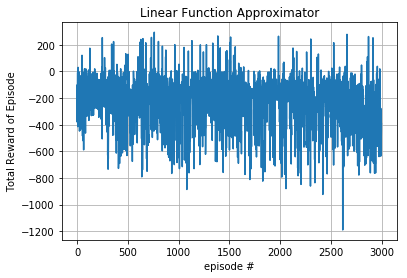

In [7]:
%pylab inline
plt.plot(rewards)
plt.xlabel('episode #')
plt.ylabel('Total Reward of Episode')
plt.title('Linear Function Approximator')
plt.grid()

Q3.

Function Approximation: \begin{align} Q(s,.) =  W^T_{(nAxnS)} \theta (s)_{(nSx1)} \end{align}
Gradient: \begin{align} \nabla  Q(s,a) =  \theta (s) \end{align}

Q4. Yes, there might be some redundant features which might be hindering the learning by linear function approximator. We experimented by removing first 2 features. Even though it is not converging yet, the reward is crossing 200 for some episodes as shown in plot above.

Better convergence will be achieved by using the feature states carefully either by hit and trial or by understanding the underlying meaning of those states